In [1]:
import torch
from torch_geometric.nn import GraphSAGE
from Meshpoolscr import MeshPooling
from torch_geometric.data import DataLoader,Data

c:\Users\10974\anaconda3\envs\Meshgraphnet_20231108\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import import_ipynb
from Unet_gnn_definmodel import cnntogra,gratocnn,cnntogra_pad,gratocnn_pad,plotedges,getcnnloss,getgnnhighloss,getcnnhighloss_mape,getgnnhighloss_mape
from Unet_gnn_definmodel import CNNadgnn,CNNadgnn_cnn1chv2,CNNadgnnIdent_GNN,CNNadgnnIdent_GNNmeshpo_small,CNNadgnnIdent_GNNmeshpo_GNNonly_small

importing Jupyter notebook from Unet_gnn_definmodel.ipynb
7587294
Number of parameters in GraphSAGE model: 68225
Number of parameters in MLP model: 67329


In [3]:
from Stressnet import Modfiedunet4shrink, Modfiedunet3shrink,StressNetori,StressNetgit,StressNetgit4shrink,Modfiedunet
from torch_geometric.nn import GraphSAGE
import torch.nn as nn

modelname='Modfiedunet4shrinkaddgnn'


In [4]:

import os
import torch

def load_graphs(directory="saved_graphs"):
    graph_files = sorted([file for file in os.listdir(directory) if file.endswith('.pt')])
    max_files=5000000
    loaded_count = 0
    for filename in graph_files:
        if max_files is not None and loaded_count >= (max_files/5):
            break
        file_path = os.path.join(directory, filename)
        igra=torch.load(file_path)
        iframe=0
        s11=igra.y[:,int(iframe*3-1-2)]
        s22=igra.y[:,int(iframe*3-1-1)]
        s12=igra.y[:,int(iframe*3-1-0)]
        svon=torch.sqrt(s11**2 - s11*s22 + s22**2 + 3*s12**2)
        igra.svon=svon.unsqueeze(dim=-1)
        yield igra
        loaded_count += 1
trainfolder='traindatameshpobatchedbatch5_meshpoweichen_p2_1014'
testfolder='testdatameshpobatchedbatch5_meshpoweichen_p2_1014'
# Example usage
for igra in load_graphs(directory=trainfolder):
    # Process each graph here
    print(igra)
    # check if there is nan in igra.xdata128
    print(torch.isnan(igra.xdata128).sum())
    print(torch.isnan(igra.ydata128).sum())
        
    break


Data(x=[42511, 3], edge_index=[2, 172779], y=[42511, 3], pos=[42511, 2], pollinfor=[42511, 5], face=[3, 82918], batch=[42511], xdata128=[5, 4, 128, 128], ydata128=[5, 1, 128, 128], rfy=[5], seedind=[5], posxy=[5], svon=[42511, 1])
tensor(0)
tensor(0)


In [5]:
igra.xdata128.shape

torch.Size([5, 4, 128, 128])

In [6]:
igra.ydata128[:,0]!=-10

tensor([[[ True,  True,  True,  ...,  True,  True,  True],
         [ True,  True,  True,  ...,  True,  True,  True],
         [ True,  True,  True,  ...,  True,  True,  True],
         ...,
         [False, False, False,  ...,  True,  True,  True],
         [False, False, False,  ...,  True,  True,  True],
         [False, False, False,  ...,  True,  True,  True]],

        [[ True,  True,  True,  ..., False, False, False],
         [ True,  True,  True,  ..., False, False, False],
         [ True,  True,  True,  ..., False, False, False],
         ...,
         [False,  True,  True,  ...,  True,  True,  True],
         [False, False,  True,  ...,  True,  True,  True],
         [False, False, False,  ...,  True,  True,  True]],

        [[ True,  True,  True,  ...,  True,  True,  True],
         [ True,  True,  True,  ...,  True,  True,  True],
         [ True,  True,  True,  ...,  True,  True,  True],
         ...,
         [False, False, False,  ...,  True,  True,  True],
         [

In [7]:
import torch_geometric
print(torch_geometric.__version__)

2.4.0


In [8]:
# device='cuda'
# hmodel=torch.load('linear0619hmodel.pt')
# hmodel=hmodel.to(device)


device='cuda'
# hmodel=CNNadgnn_cnn1ch_cnnonly()


# model=torch.load('CNNGNN500_meshpo_gnnhigloss_7M.pt')

In [9]:
# print model num params
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

Evaluating model: Graph-enhanced
Number of parameters: 7188180
Percentile: 90
Percentile: 91
Percentile: 92
Percentile: 93
Percentile: 94
Percentile: 95
Percentile: 96
Percentile: 97
Percentile: 98
Percentile: 99
Evaluating model: MLP-enhanced
Number of parameters: 7170772
Percentile: 90
Percentile: 91
Percentile: 92
Percentile: 93
Percentile: 94
Percentile: 95
Percentile: 96
Percentile: 97
Percentile: 98
Percentile: 99
Evaluating model: Moddified U-Net
Number of parameters: 7120387
Percentile: 90
Percentile: 91
Percentile: 92
Percentile: 93
Percentile: 94
Percentile: 95
Percentile: 96
Percentile: 97
Percentile: 98
Percentile: 99


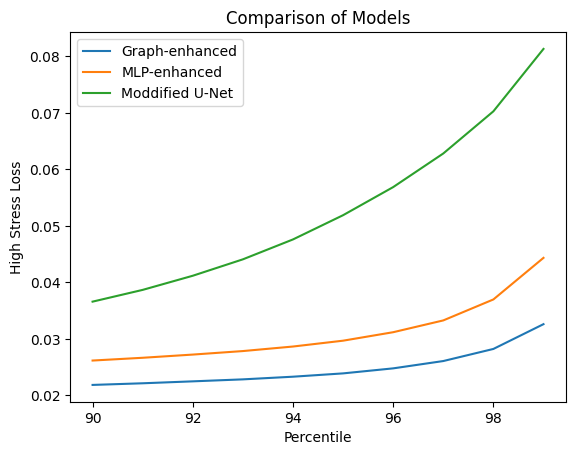

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from Unet_gnn_definmodel import cnntogra,gratocnn,cnntogra_pad,gratocnn_pad,plotedges,getcnnloss,getgnnhighloss,getgnnhighloss_value
# 设置设备
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def evaluate_model_value(model, trainfolder, ipercent_range):
    """评估模型性能并返回高应力损失列表"""
    highloss_list = []

    model.eval()
    for iperc in ipercent_range:
        print(f"Percentile: {iperc}")
        total_test_cnn_loss, total_test_gnn_loss, total_test_cnngraloss, total_test_higstresloss = 0.0, 0.0, 0.0, 0.0
        lentest_dataset = 0

        non_zero_highstress_losses = []

        with torch.no_grad():
            for igra in load_graphs(directory=testfolder):
                igra = igra.to(device)
                x5, gx5final = model(igra)

                cnnloss = torch.mean(torch.abs(x5 - igra.ydata128.to(device)))
                # losshighstress = getgnnhighloss_value(igra.svon, gx5final, igra.batch, threshold_value=iperc)
                losshighstress = getgnnhighloss_mape(igra.svon, gx5final, igra.batch,percentile=iperc)
                gnnloss = torch.mean(torch.abs(gx5final - igra.svon))

                loss = gnnloss + cnnloss + losshighstress
                cnngraloss = loss

                # 累计损失
                total_test_cnn_loss += cnnloss.item()
                total_test_gnn_loss += gnnloss.item()
                total_test_cnngraloss += cnngraloss.item()

                if losshighstress.item() != 0:  # 只添加非零的损失值
                    non_zero_highstress_losses.append(losshighstress.item())

                lentest_dataset += 1

        # 计算非零值的平均高应力损失
        if non_zero_highstress_losses:
            avg_test_higstresloss = sum(non_zero_highstress_losses) / len(non_zero_highstress_losses)
        else:
            avg_test_higstresloss = 0  # 如果没有非零损失，则返回0
        highloss_list.append(avg_test_higstresloss)

    return highloss_list

def evaluate_model_value_CNN(model, trainfolder, ipercent_range):
    """评估模型性能并返回高应力损失列表"""
    highloss_list = []

    model.eval()
    for iperc in ipercent_range:
        print(f"Percentile: {iperc}")
        total_test_cnn_loss, total_test_gnn_loss, total_test_cnngraloss, total_test_higstresloss = 0.0, 0.0, 0.0, 0.0
        lentest_dataset = 0

        non_zero_highstress_losses = []

        with torch.no_grad():
            for igra in load_graphs(directory=testfolder):
                igra = igra.to(device)
                x5, gx5final = model(igra)

                cnnloss = torch.mean(torch.abs(x5 - igra.ydata128.to(device)))
                # losshighstress = getgnnhighloss_value(igra.svon, gx5final, igra.batch, threshold_value=iperc)
                # losshighstress = getcnnhighloss_mape(igra.svon, gx5final, igra.batch,percentile=iperc)
                losshighstress = getcnnhighloss_mape(igra.xdata128, x5,igra.ydata128,percentile=iperc)
                gnnloss = torch.mean(torch.abs(gx5final - igra.svon))

                loss = gnnloss + cnnloss + losshighstress
                cnngraloss = loss

                # 累计损失
                total_test_cnn_loss += cnnloss.item()
                total_test_gnn_loss += gnnloss.item()
                total_test_cnngraloss += cnngraloss.item()

                if losshighstress.item() != 0:  # 只添加非零的损失值
                    non_zero_highstress_losses.append(losshighstress.item())

                lentest_dataset += 1

        # 计算非零值的平均高应力损失
        if non_zero_highstress_losses:
            avg_test_higstresloss = sum(non_zero_highstress_losses) / len(non_zero_highstress_losses)
        else:
            avg_test_higstresloss = 0  # 如果没有非零损失，则返回0
        highloss_list.append(avg_test_higstresloss)

    return highloss_list




# model_paths = ['CNNGNN500_gnnloss_lin.pt', 'CNNonly500_gnnloss_lin.pt']
# model_labels = ['Graph-enhanced', 'MLP-enhanced']

model_paths = ['CNNGNN500_gnnloss_lin.pt', 'CNNonly500_gnnloss_lin.pt','CNNonly500_cnnloss_lin_masked.pt']
model_labels = ['Graph-enhanced', 'MLP-enhanced', 'Moddified U-Net']

# model_paths = ['CNNonly500_cnnloss_lin.pt']
# model_labels = ['Moddified U-Net']


# ipercent_range = np.arange(0.3,0.4,0.02)
# trainfolder =  trainfolder 
ipercent_range = np.arange(90,100,1) # 99% is the hightest loss of CNN model

all_highloss_lists = []


for path, label in zip(model_paths, model_labels):
    print(f"Evaluating model: {label}")
    model = torch.load(path).to(device)
    print(f"Number of parameters: {count_parameters(model)}")
    if label=='Moddified U-Net':
        highloss_list = evaluate_model_value_CNN(model, trainfolder, ipercent_range)
    else:
        highloss_list = evaluate_model_value(model, trainfolder, ipercent_range)
    all_highloss_lists.append(highloss_list)


x = ipercent_range 
for highloss_list, label in zip(all_highloss_lists, model_labels):
    plt.plot(x, highloss_list, label=label)

plt.xlabel('Percentile')
plt.ylabel('High Stress Loss')
plt.legend()
plt.title('Comparison of Models')
plt.show()


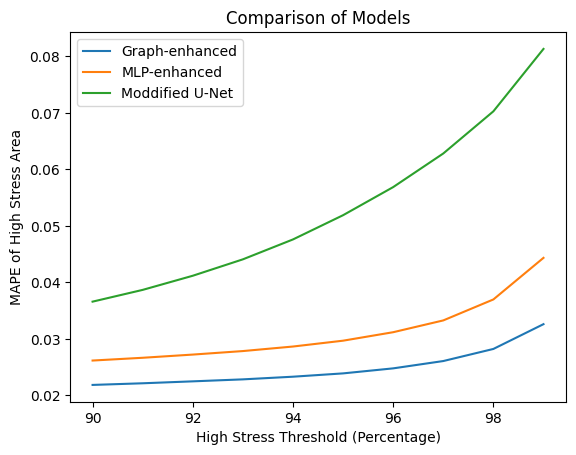

In [12]:
# save the figure as svg and save the data as csv
import pandas as pd
df=pd.DataFrame(all_highloss_lists).T
df.columns=model_labels
df.index=ipercent_range
df.to_csv('highstressloss.csv')
plt.plot(df)
plt.xlabel('High Stress Threshold (Percentage)')
plt.ylabel('MAPE of High Stress Area')
plt.legend(model_labels)
plt.title('Comparison of Models')

plt.savefig('highstressloss.svg')